# Applied Statistics - Project

Submitted by Pranov Shobhan Mishra

Data Set description
The insurance.csv dataset contains 1338 observations and 7 attributes.
Context: The data contains medical costs of people characterized by certain attributes. Let’s see if we can dive deep into this data to find some valuable insights.

# Tasks to perform

1. Perform basic EDA which should include the following and print out your insights at every step.
a. Shape of the data
b. Data type of each attribute
c. Checking the presence of missing values
d. 5 point summary of numerical attributes
e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.
f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns
g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns
h. Distribution of categorical columns (include children)
i. Pair plot that includes all the columns of the data frame
2. Answer the following questions with statistical evidence
a. Do charges of people who smoke differ significantly from the people who don't?
b. Does bmi of males differ significantly from that of females?
c. Is the proportion of smokers significantly different in different genders?
d. Is the distribution of bmi across women with no children, one child and two children, the same ?

In [1]:
# Import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats

In [2]:
#read the data as a dataframe
Ins=pd.read_csv("insurance.csv")

In [3]:
#The shape of the data is given below. There are 1338 rows and 7 columns
Ins.shape

(1338, 7)

In [4]:
#Data type for each attribute
Ins.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
##Checking presence of Missing Values. No missing values
Ins.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
Ins.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [ ]:
#5 point summary of numerical attributes

In [7]:
Numeric=Ins.dtypes[(Ins.dtypes=='int64') | (Ins.dtypes=='float64')].index.tolist()
Numeric

['age', 'bmi', 'children', 'charges']

In [11]:
for i in range(len(Numeric)):
    print("Five point Summary : " , Numeric[i])
    print("Min : " , np.percentile(Ins[Numeric[i]],0))
    print("Q1 : " , np.percentile(Ins[Numeric[i]],25))
    print("Q2 : " , np.percentile(Ins[Numeric[i]],50))
    print("Q3 : " , np.percentile(Ins[Numeric[i]],75))
    print("Max : " , np.percentile(Ins[Numeric[i]],100))
    print("======================================")

Five point Summary :  age
Min :  18.0
Q1 :  27.0
Q2 :  39.0
Q3 :  51.0
Max :  64.0
Five point Summary :  bmi
Min :  15.96
Q1 :  26.29625
Q2 :  30.4
Q3 :  34.69375
Max :  53.13
Five point Summary :  children
Min :  0.0
Q1 :  0.0
Q2 :  1.0
Q3 :  2.0
Max :  5.0
Five point Summary :  charges
Min :  1121.8739
Q1 :  4740.28715
Q2 :  9382.033
Q3 :  16639.912515
Max :  63770.42801


The variable 'children' though numeric when data was imported, it is more of a ordinal variable and would be converted to categorical variable for further analysis (as will be seen later in the project)

In [ ]:
#Distribution of age, bmi and charges is below alongwith the respective skewness associated with each variable

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Skewness in age is calculated as  0.0556


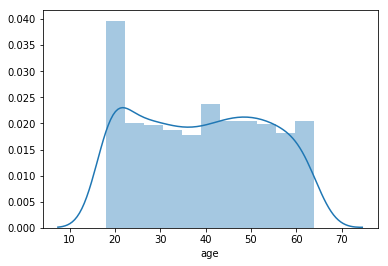

In [20]:
sns.distplot(Ins['age'])
print("Skewness in age is calculated as " , round(stats.skew(Ins['age']),4))

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Skewness in bmi is calculated as  0.2837


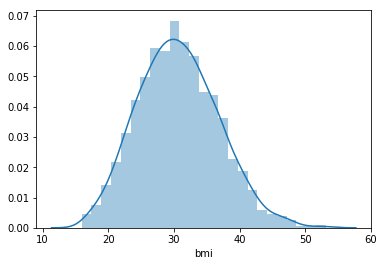

In [21]:
sns.distplot(Ins['bmi'])
print("Skewness in bmi is calculated as " , round(stats.skew(Ins['bmi']),4))

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Skewness in charges is calculated as  1.5142


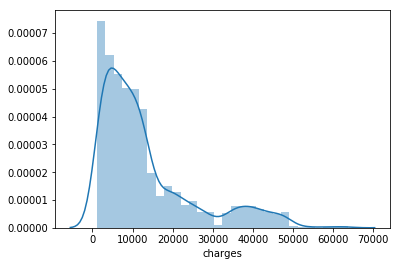

In [22]:
sns.distplot(Ins['charges'])
print("Skewness in charges is calculated as " , round(stats.skew(Ins['charges']),4))

In [ ]:
#Outliers can be calculated using boxplot. See below

Text(0.5,1,'Age - Boxplot')

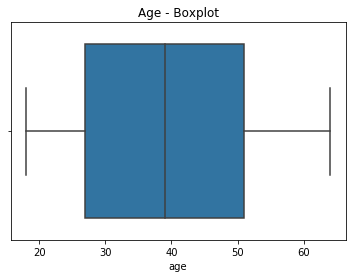

In [18]:
sns.boxplot(Ins['age'])
plt.title("Age - Boxplot")

In [ ]:
# No outliers found in the 'age' variable

Text(0.5,1,'Charges - Boxplot')

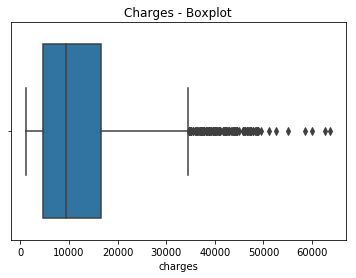

In [38]:
sns.boxplot(Ins['charges'])
plt.title("Charges - Boxplot")

In [22]:
Q1=np.percentile(Ins['charges'],25)
Q3=np.percentile(Ins['charges'],75)
IQR=Q3-Q1
UL=Q3+1.5*IQR
Outliers=Ins[Ins['charges']>UL]['charges']
Outliers.shape

(139,)

In [ ]:
#There are 139 outliers which can be retrieved by printing the object 'Outliers' i.e. type print(Outliers)

Text(0.5,1,'bmi - Boxplot')

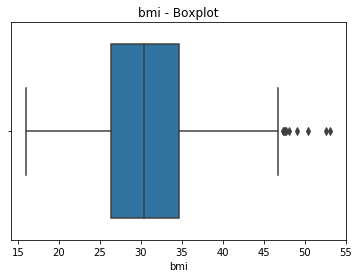

In [39]:
sns.boxplot(Ins['bmi'])
plt.title("bmi - Boxplot")

In [24]:
Q1=np.percentile(Ins['bmi'],25)
Q3=np.percentile(Ins['bmi'],75)
IQR=Q3-Q1
UL=Q3+1.5*IQR
Outliers=Ins[Ins['bmi']>UL]['bmi']
Outliers

116     49.06
286     48.07
401     47.52
543     47.41
847     50.38
860     47.60
1047    52.58
1088    47.74
1317    53.13
Name: bmi, dtype: float64

In [ ]:
#Distribution of categorical columns (include children)

In [43]:
Ins['children']=pd.Categorical(Ins['children'])
Ins.dtypes

age            int64
sex           object
bmi          float64
children    category
smoker        object
region        object
charges      float64
dtype: object

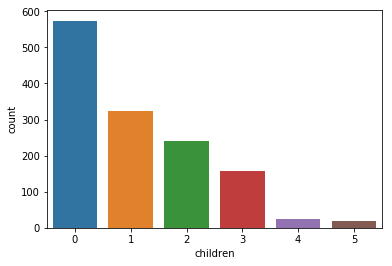

In [24]:
sns.countplot(Ins['children'])

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'')

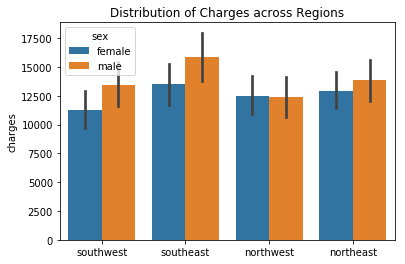

In [39]:
sns.barplot(Ins['region'],Ins['charges'], hue=Ins['sex'])
plt.title("Distribution of Charges across Regions")
plt.xlabel("")

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'')

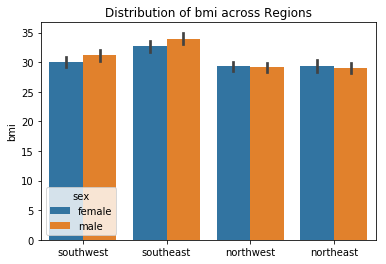

In [41]:
sns.barplot(Ins['region'],Ins['bmi'], hue=Ins['sex'])
plt.title("Distribution of bmi across Regions")
plt.xlabel("")

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


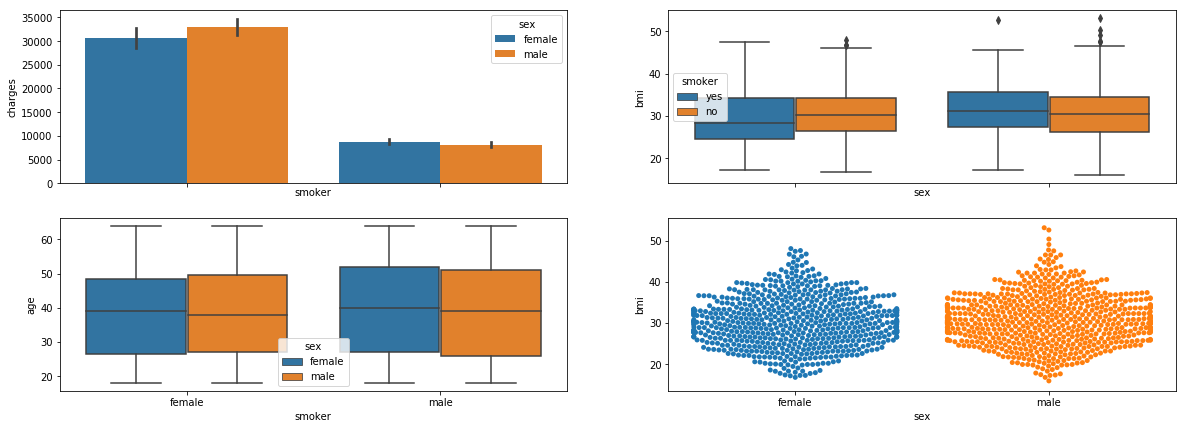

In [25]:
f, axes = plt.subplots(2, 2, figsize=(20, 7), sharex=True)
sns.barplot(x='smoker', y= 'charges', hue='sex',data=Ins, ax=axes[0,0])
sns.boxplot(x='sex',y='bmi',hue='smoker' ,data=Ins, ax=axes[0,1])
sns.boxplot(x='smoker',y='age' ,hue='sex',data=Ins, ax=axes[1,0])
sns.swarmplot(x='sex',y='bmi' ,data=Ins, ax=axes[1,1])

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


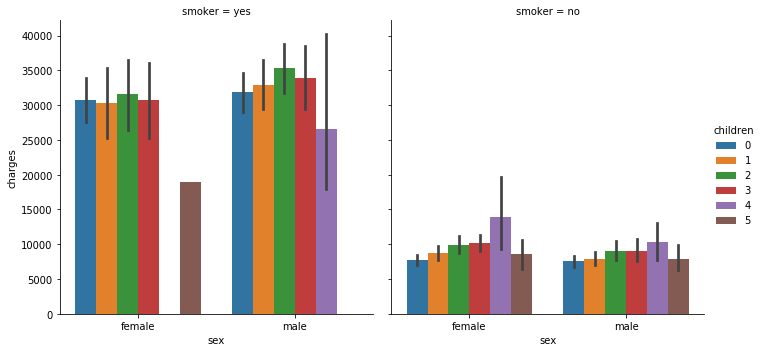

In [40]:
sns.catplot(x='sex',y='charges', hue='children', col='smoker', kind="bar", data=Ins)

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


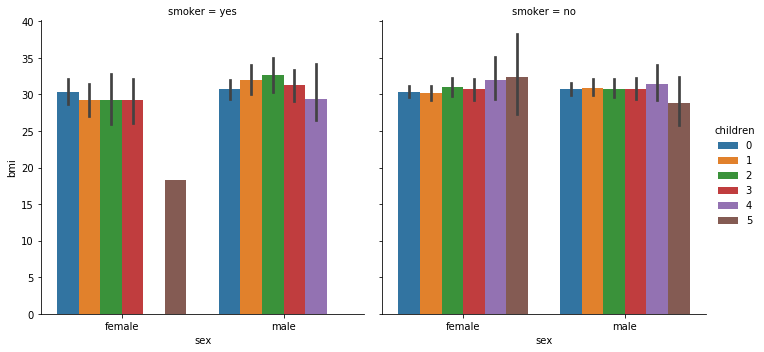

In [42]:
sns.catplot(x='sex',y='bmi', hue='children', col='smoker', kind="bar", data=Ins)

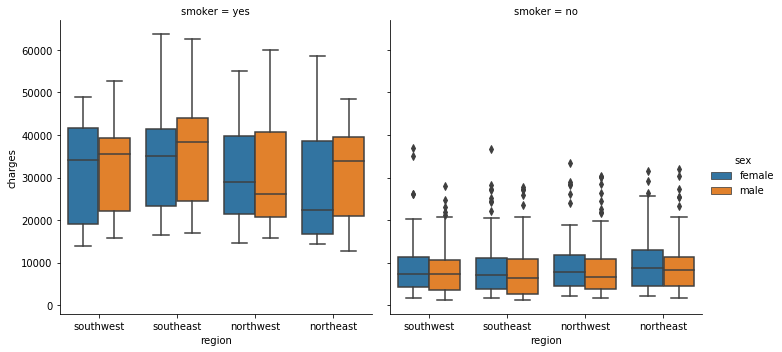

In [34]:
sns.catplot(y='charges', x='region',hue='sex', data=Ins, kind='box',col='smoker')

In [ ]:
#Pair plot that includes all the columns of the data frame

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


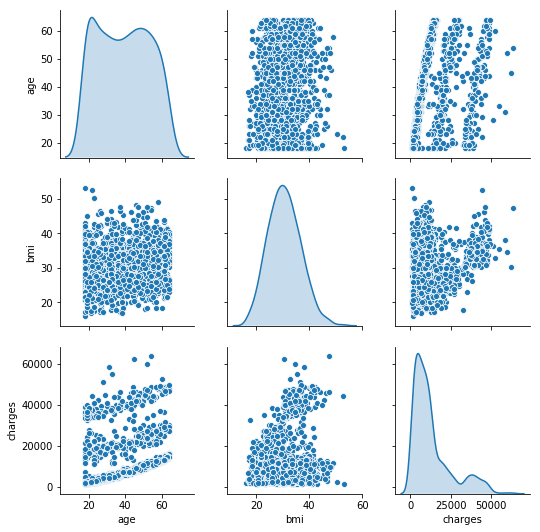

In [47]:
sns.pairplot(Ins[['age' , 'bmi' ,'charges']], kind='scatter', diag_kind='kde')

In [48]:
from scipy.stats import ttest_1samp,ttest_ind, wilcoxon
from statsmodels.stats.power import ttest_power
import matplotlib.pyplot     as     plt

# Hypothesis Test: Do charges of people who smoke differ significantly from the people who don't?
Ho: Mean of charges of smokers = Mean of charges of non-smokers.
Ha: Mean of charges of smokers <> Mean of charges of non-smokers

In [66]:
t_statistic, p_value = stats.ttest_ind(Ins[Ins['smoker']=='yes']['charges'],Ins[Ins['smoker']=='no']['charges'])
print("t_statistic when comparing charges of smokers V non-smokers is %.4f" % t_statistic)
print("p_value when comparing charges of smokers V non-smokers is %.5f" % p_value)

t_statistic when comparing charges of smokers V non-smokers is 46.6649
p_value when comparing charges of smokers V non-smokers is 0.00000


Null hypothesis is rejected meaning the mean of charges for smokers is not equal to that of non-smokers

In [68]:
alpha=0.05
t_critical=[stats.t.ppf(alpha/2,len(Ins)-2),stats.t.ppf(1-alpha/2,len(Ins)-2)]
t_critical

[-1.9617412190546961, 1.9617412190546957]

In [69]:
Smokers=Ins[Ins['smoker']=='yes']['charges']
X1=np.mean(Smokers)
n1=len(Smokers)
s1=np.std(Smokers)
Non_Smokers=Ins[Ins['smoker']=='no']['charges']
X2=np.mean(Non_Smokers)
n2=len(Non_Smokers)
s2=np.std(Non_Smokers)
D=X1-X2
SE=np.sqrt(s1**2/n1+s2**2/n2)

In [70]:
tstat=D/SE
tstat

32.80892081978336

In [28]:
p_val=1-stats.t.cdf(tstat, n1+n2-2)
p_val

0.0

# Hypothesis test: Does bmi of males differ significantly from that of females?

In [55]:
t_stat, p_value =stats.ttest_ind(Ins[Ins['sex']=='male']['bmi'],Ins[Ins['sex']=='female']['bmi'])
print("t_statistic when comparing bmi of males V females is %.4f" % t_stat)
print("p_value when comparing bmi of males V females is %1.5f" % p_value)

t_statistic when comparing bmi of males V females is 1.6968
p_value when comparing bmi of males V females is 0.08998


p_value greater than 0.05 i.e. Null Hypotheis cannot be rejected. 
That means average bmi for males and females are not statistically different.
Visual representation of tstat and tcritical alongwith accepatance and rejection region is depicted below

In [56]:
alpha=0.05/2
n1=len(Ins[Ins['sex']=='male'])
n2=len(Ins[Ins['sex']=='female'])
t_crit=[stats.t.ppf(alpha,n1+n2-2), stats.t.ppf(1-alpha,n1+n2-2)]
t_crit

[-1.9617412190546961, 1.9617412190546957]

Text(0,0.5,'Density')

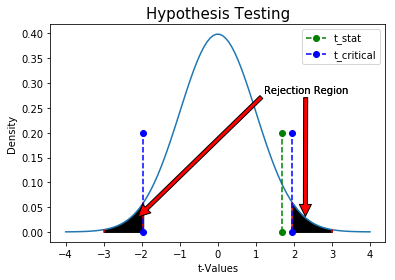

In [57]:
x=np.linspace(-4,4,100)
den=stats.t.pdf(x,len(Ins[Ins['sex']=='male']['bmi'])-2)
plt.plot(x,den)

# fill area 1 (Rejection Area)

pt1 = t_crit[0]
plt.plot([t_crit[0],t_crit[0]],[0,stats.t.pdf(t_crit[0],len(Ins[Ins['sex']=='male']['bmi'])-2)],color="red")

pt2 = -3
plt.plot([pt2 ,pt2 ],[0.0,stats.t.pdf(pt2,676)], color='red')

ptx = np.linspace(pt1, pt2, 10)
pty = stats.t.pdf(ptx,676)

plt.fill_between(ptx, pty, color='black', alpha='1.0')
plt.annotate('Rejection Region', xy=(2.3,0.03), xytext=(1.2,0.28), arrowprops=dict(facecolor='red', shrink = 0.005))


pt1 = t_crit[1]
plt.plot([pt1 ,pt1 ],[0.0,stats.t.pdf(pt1,676)], color='red')

pt2 = 3
plt.plot([pt2 ,pt2 ],[0.0,stats.t.pdf(pt2,676)], color='red')


ptx = np.linspace(pt1, pt2, 10)
pty = stats.t.pdf(ptx,676)

plt.fill_between(ptx, pty, color='black', alpha='1.0')
plt.annotate('Rejection Region', xy=(-2.1,0.03), xytext=(1.2,0.28), arrowprops=dict(facecolor='red', shrink = 0.001))

plt.plot((t_stat,t_stat),(0,0.2),'go--', label="t_stat")
plt.plot((t_crit[0],t_crit[0]),(0,0.2), 'bo--',label="t_critical")
plt.plot((t_crit[1],t_crit[1]),(0,0.2), 'bo--')
plt.legend()
plt.title("Hypothesis Testing", size=15)
plt.xlabel("t-Values")
plt.ylabel("Density")

# Chi Square test: Is the proportion of smokers significantly different in different genders?

In [9]:
cont=pd.crosstab(Ins['smoker'],Ins['sex'])
cont

sex,female,male
smoker,,
no,547,517
yes,115,159


In [10]:
from scipy.stats import chisquare, chi2_contingency

In [11]:
chi2_contingency(cont)

(7.39291081459996,
 0.006548143503580696,
 1,
 array([[526.43348281, 537.56651719],
        [135.56651719, 138.43348281]]))

# p_val is 0.0065 which is less than 0.05 indicating rejection of null hypothesis (which represents status quo i.e. there is no difference in the proportion of smokers amongst different genders.

# ANOVA(Comparioson of means of more than 2 populations) : Is the distribution of bmi across women with no children, one child and two children, the same ?

In [58]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [59]:
#Data constituting of bmi for women with no children, 1 child or two children
y=Ins[((Ins['children']==0) |(Ins['children']==1) | (Ins['children']==2)) & (Ins['sex']=='female')]
y['children']=pd.Categorical(y['children'])
y['sex']= pd.Categorical(y['sex'])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


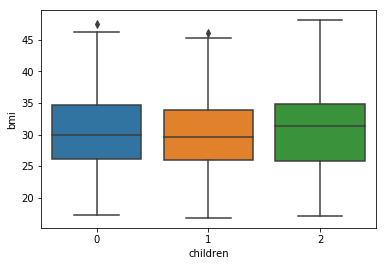

In [60]:
sns.boxplot(y['children'], y['bmi'])

In [1]:
#No major difference noticeable!

In [62]:
y.groupby('children')['bmi'].mean()

children
0    30.361522
1    30.052658
2    30.649790
Name: bmi, dtype: float64

In [61]:
formula='bmi ~ C(children)'

In [63]:
Model1=ols(formula, y).fit()
anova_table=anova_lm(Model1)
print(Model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.3345
Date:                Tue, 23 Jul 2019   Prob (F-statistic):              0.716
Time:                        01:26:43   Log-Likelihood:                -1821.7
No. Observations:                 566   AIC:                             3649.
Df Residuals:                     563   BIC:                             3662.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           30.3615      0.357  

In [64]:
print(anova_table)

                df        sum_sq    mean_sq         F    PR(>F)
C(children)    2.0     24.590123  12.295062  0.334472  0.715858
Residual     563.0  20695.661583  36.759612       NaN       NaN


P value not significant indicating no difference in means of bmi for females with 0,1 or 2 children